# Compare time-to-convergence vs. batch size
Compare the walltime to get to get from 0.0 train accuracy to 0.60 train accuracy, varying the batch size (8 nodes).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from textwrap import wrap
import seaborn as sns
import datetime
import DataSet

In [18]:
# Load the data
files = ['../data_nsys/2_node/batchsize_2/',
         '../data_nsys/2_node/batchsize_3/']

d = DataSet.DataSet()
for f in files:
    d.parseInput(f, mode='batch')

Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r0.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r8.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r12.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r7.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r6.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r14.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r1.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r4.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r2.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r3.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r5.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r9.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r15.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r10.w16.txt
Parsing ../data_nsys/2_node/batchsize_2/nsys.1588226.0.r11.w16.txt
Parsi

## Plotting preferences

In [19]:
golden = 1.61803398875
figWidth = 5. # inches
figLength = figWidth/golden
figSize1x1 = (figWidth, figLength)

rcParams['font.sans-serif'] = 'Arial'
rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['mathtext.it'] = 'Arial:italic'
rcParams['mathtext.bf'] = 'Arial:bold'
rcParams['axes.labelsize'] = '12'
rcParams['xtick.labelsize'] = '12'
rcParams['ytick.labelsize'] = '12'
rcParams['legend.labelspacing'] = '0.1'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['ytick.right'] = True
rcParams['xtick.top'] = True
rcParams['axes.linewidth'] = 2.0
rcParams['xtick.major.size'] = 3.5
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.size'] = 2.5
rcParams['xtick.minor.width'] = 1.0
rcParams['ytick.major.size'] = 3.5
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.size'] = 2.5
rcParams['ytick.minor.width'] = 1.0
rcParams['lines.markersize'] = 7
rcParams['lines.linewidth'] = 1.5

markers1 = np.array(['o', '^', 's', 'x', 'd', 'v'])
markers2 = np.array(['s', 'o', 'x', '*'])
# Other options: Dark2, Pastel1, Pastel2, Accent,
# Set1, Set2, Set3, tab10, tab20, tab20b, tab20c
colors = sns.color_palette('muted') + sns.color_palette('dark',)

In [21]:
batch_size = np.array(['2', '3'])
duration_seconds = []

starts = np.array([1614855245423, 1614855218454]) # 0.0 train_accuracy
stops  = np.array([1614857421373, 1614857127312]) # <= 0.56 train_accuracy
steps  = np.array([3000, 2100])
acc    = np.array([0.5537644492255317, 0.5575202306111654]) 

In [23]:
for i,b in enumerate(batch_size):
    start = starts[i]
    stop = stops[i]
    t = stop - start
    t_seconds = t*10.**-3
    t_minutes = int(round(t_seconds / 60))
    duration_seconds.append(t_seconds)
    print("batch size = {}, duration = {} sec = {} min".format(b, t_seconds, t_minutes))

batch size = 2, duration = 2175.95 sec = 36 min
batch size = 3, duration = 1908.858 sec = 32 min


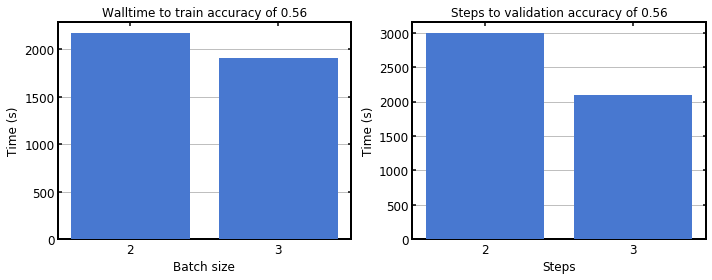

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
plt.sca(axs[0])
x = range(len(batch_size))
plt.bar(x, duration_seconds, zorder=5, color=colors[0])
plt.xlabel('Batch size')
plt.ylabel('Time (s)')
plt.title('Walltime to train accuracy of 0.56')
plt.gca().yaxis.grid(True)
plt.xticks(x, labels=batch_size);

plt.sca(axs[1])
x = range(len(batch_size))
plt.bar(x, steps, zorder=5, color=colors[0])
plt.xlabel('Steps')
plt.ylabel('Time (s)')
plt.title('Steps to validation accuracy of 0.56')
plt.gca().yaxis.grid(True)
plt.xticks(x, labels=batch_size);

plt.tight_layout()

## GPU Kernel Time

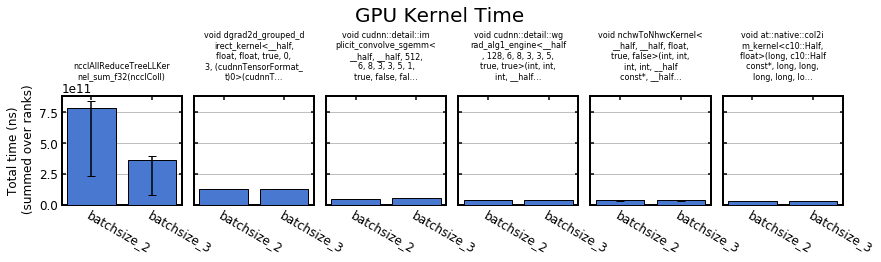

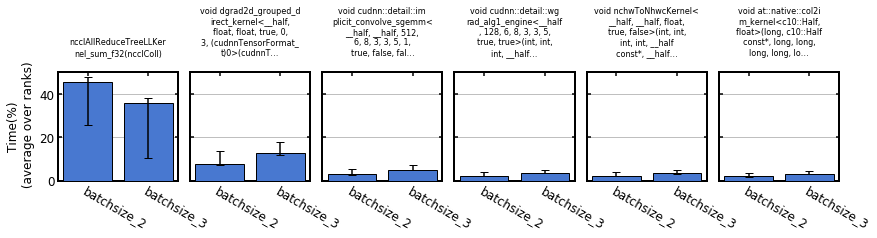

In [12]:
nRoutines = 6
all_batch = list(d._hash.keys())[:]
ranksPerNodeCori = 8
n_nodes = 2
nRanks = np.array([ranksPerNodeCori*n_nodes for x in all_batch])
expensiveRoutines = d['batchsize_2']['r0']['gpukernsum']['Name'][:nRoutines].values

# Compare raw times
fig, axs = plt.subplots(nrows=1, ncols=nRoutines, sharey=True, figsize=(14, 2.))
plt.suptitle('GPU Kernel Time', y=1.5, fontsize=20)
for i, routine in enumerate(expensiveRoutines):
    expensiveRoutineTimesSum = [ np.array( [np.array(d[batch][r]['gpukernsum'].loc[d[batch][r]['gpukernsum']['Name'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).sum() for batch in all_batch]
    expensiveRoutineTimesMin = [ np.array( [np.array(d[batch][r]['gpukernsum'].loc[d[batch][r]['gpukernsum']['Name'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).min() for batch in all_batch] 
    expensiveRoutineTimesMax = [ np.array( [np.array(d[batch][r]['gpukernsum'].loc[d[batch][r]['gpukernsum']['Name'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).max() for batch in all_batch]
    yerrs = np.array([err for err in zip(np.array(expensiveRoutineTimesSum) - nRanks*np.array(expensiveRoutineTimesMin), 
                                         nRanks*np.array(expensiveRoutineTimesMax) - np.array(expensiveRoutineTimesSum))]).T
    
    plt.sca(axs.flatten()[i])
    plt.gca().set_title("\n".join(wrap(routine, 22)), fontsize='8')
    plt.gca().title.set_y(1.1)
    plt.bar(all_batch, expensiveRoutineTimesSum, color=colors[0], 
            yerr=yerrs, edgecolor='k',
           capsize=4, zorder=10, ecolor='k')
    plt.gca().yaxis.grid(True)

    plt.xticks(rotation=-30, ha="left", rotation_mode="anchor")
    if i==0: plt.ylabel('Total time (ns)\n (summed over ranks)')
    
fig.subplots_adjust(wspace=0.1)
#plt.savefig('figs/DeepCam_Batch_GPU_Kernel_Time_ns.png', dpi=150, bbox_inches='tight')

# Compare % times
fig, axs = plt.subplots(nrows=1, ncols=nRoutines, sharey=True, figsize=(14, 2.))
for i, routine in enumerate(expensiveRoutines):
    expensiveRoutineTimesSum = [ np.array( [np.array(d[batch][r]['gpukernsum'].loc[d[batch][r]['gpukernsum']['Name'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).mean() for batch in all_batch]
    expensiveRoutineTimesMin = [ np.array( [np.array(d[batch][r]['gpukernsum'].loc[d[batch][r]['gpukernsum']['Name'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).min() for batch in all_batch] 
    expensiveRoutineTimesMax = [ np.array( [np.array(d[batch][r]['gpukernsum'].loc[d[batch][r]['gpukernsum']['Name'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).max() for batch in all_batch]
    yerrs = np.array([err for err in zip(np.array(expensiveRoutineTimesSum) - np.array(expensiveRoutineTimesMin), 
                                         np.array(expensiveRoutineTimesMax) - np.array(expensiveRoutineTimesSum))]).T
    
    plt.sca(axs.flatten()[i])
    plt.gca().set_title("\n".join(wrap(routine, 22)), fontsize='8')
    plt.gca().title.set_y(1.1)
    plt.bar(all_batch, expensiveRoutineTimesSum, color=colors[0], 
            yerr=yerrs, edgecolor='k',
           capsize=4, zorder=10, ecolor='k')
    plt.gca().yaxis.grid(True)

    plt.xticks(rotation=-30, ha="left", rotation_mode="anchor")
    if i==0: plt.ylabel('Time(%)\n (average over ranks)')
    
fig.subplots_adjust(wspace=0.1)
#plt.savefig('figs/DeepCam_Batch_GPU_Kernel_Time_Percent.png', dpi=150, bbox_inches='tight')

## GPU Mem Time

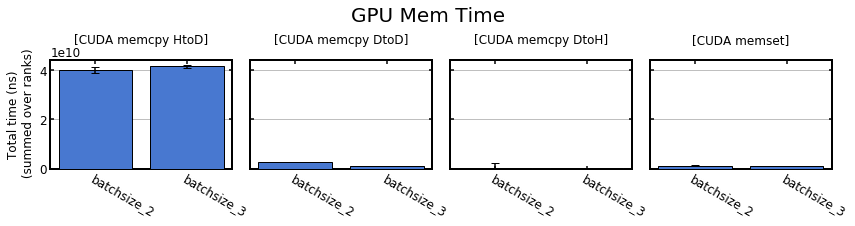

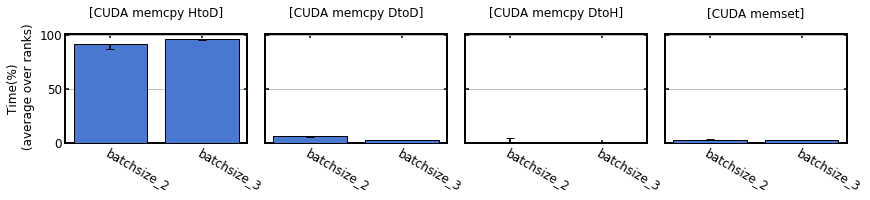

In [14]:
nRoutines = 6
all_batch = list(d._hash.keys())[:]
ranksPerNodeCori = 8
n_nodes = 2
nRanks = np.array([ranksPerNodeCori*n_nodes for x in all_batch])
expensiveRoutines = d['batchsize_2']['r0']['gpumemtimesum']['Operation'].values

# Compare raw times
fig, axs = plt.subplots(nrows=1, ncols=len(expensiveRoutines), sharey=True, figsize=(14, 2.))
plt.suptitle('GPU Mem Time', y=1.25, fontsize=20)
for i, routine in enumerate(expensiveRoutines):
    expensiveRoutineTimesSum = [ np.array( [np.array(d[batch][r]['gpumemtimesum'].loc[d[batch][r]['gpumemtimesum']['Operation'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).sum() for batch in all_batch]
    expensiveRoutineTimesMin = [ np.array( [np.array(d[batch][r]['gpumemtimesum'].loc[d[batch][r]['gpumemtimesum']['Operation'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).min() for batch in all_batch] 
    expensiveRoutineTimesMax = [ np.array( [np.array(d[batch][r]['gpumemtimesum'].loc[d[batch][r]['gpumemtimesum']['Operation'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).max() for batch in all_batch]
    yerrs = np.array([err for err in zip(np.array(expensiveRoutineTimesSum) - nRanks*np.array(expensiveRoutineTimesMin), 
                                         nRanks*np.array(expensiveRoutineTimesMax) - np.array(expensiveRoutineTimesSum))]).T
    
    plt.sca(axs.flatten()[i])
    plt.gca().set_title("\n".join(wrap(routine, 22)))
    plt.gca().title.set_y(1.1)
    plt.bar(all_batch, expensiveRoutineTimesSum, color=colors[0], 
            yerr=yerrs, edgecolor='k',
           capsize=4, zorder=5, ecolor='k')
    plt.gca().yaxis.grid(True)

    plt.xticks(rotation=-30, ha="left", rotation_mode="anchor")
    if i==0: plt.ylabel('Total time (ns)\n (summed over ranks)')
    
fig.subplots_adjust(wspace=0.1)
#plt.savefig('figs/DeepCam_Batch_GPU_Mem_Time_ns.png', dpi=150, bbox_inches='tight')

# Compare % times
fig, axs = plt.subplots(nrows=1, ncols=len(expensiveRoutines), sharey=True, figsize=(14, 2.))
for i, routine in enumerate(expensiveRoutines):
    expensiveRoutineTimesSum = [ np.array( [np.array(d[batch][r]['gpumemtimesum'].loc[d[batch][r]['gpumemtimesum']['Operation'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).mean() for batch in all_batch]
    expensiveRoutineTimesMin = [ np.array( [np.array(d[batch][r]['gpumemtimesum'].loc[d[batch][r]['gpumemtimesum']['Operation'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).min() for batch in all_batch] 
    expensiveRoutineTimesMax = [ np.array( [np.array(d[batch][r]['gpumemtimesum'].loc[d[batch][r]['gpumemtimesum']['Operation'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).max() for batch in all_batch]
    yerrs = np.array([err for err in zip(np.array(expensiveRoutineTimesSum) - np.array(expensiveRoutineTimesMin), 
                                         np.array(expensiveRoutineTimesMax) - np.array(expensiveRoutineTimesSum))]).T
    
    plt.sca(axs.flatten()[i])
    plt.gca().set_title("\n".join(wrap(routine, 22)))
    plt.gca().title.set_y(1.1)
    plt.bar(all_batch, expensiveRoutineTimesSum, color=colors[0], 
            yerr=yerrs, edgecolor='k',
           capsize=4, zorder=5, ecolor='k')
    plt.gca().yaxis.grid(True)

    plt.xticks(rotation=-30, ha="left", rotation_mode="anchor")
    if i==0: plt.ylabel('Time(%)\n (average over ranks)')
    
fig.subplots_adjust(wspace=0.1)
#plt.savefig('figs/DeepCam_Batch_GPU_Mem_Time_Percent.png', dpi=150, bbox_inches='tight')

## CUDA API Time

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


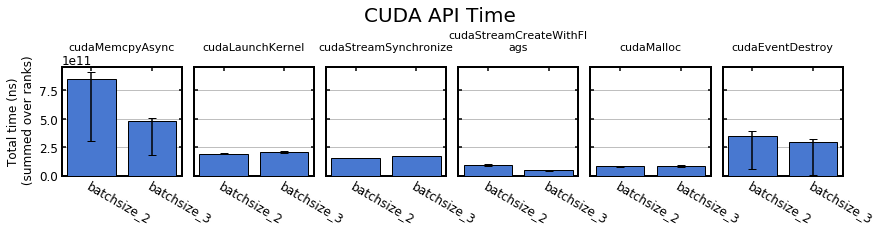

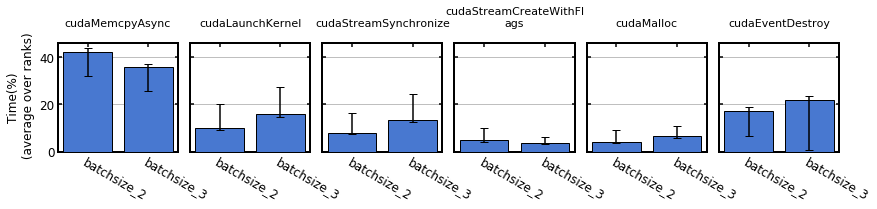

In [15]:
nRoutines = 6
all_batch = list(d._hash.keys())[:]
ranksPerNodeCori = 8
n_nodes = 2
nRanks = np.array([ranksPerNodeCori*n_nodes for x in all_batch])
expensiveRoutines = d['batchsize_2']['r0']['cudaapisum']['Name'][:nRoutines].values

# Compare raw times
fig, axs = plt.subplots(nrows=1, ncols=nRoutines, sharey=True, figsize=(14, 2.))
plt.suptitle('CUDA API Time', y=1.3, fontsize=20)
for i, routine in enumerate(expensiveRoutines):
    expensiveRoutineTimesSum = [ np.array( [np.array(d[batch][r]['cudaapisum'].loc[d[batch][r]['cudaapisum']['Name'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).sum() for batch in all_batch]
    expensiveRoutineTimesMin = [ np.array( [np.array(d[batch][r]['cudaapisum'].loc[d[batch][r]['cudaapisum']['Name'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).min() for batch in all_batch] 
    expensiveRoutineTimesMax = [ np.array( [np.array(d[batch][r]['cudaapisum'].loc[d[batch][r]['cudaapisum']['Name'] == routine]['Total Time (ns)'])
                                             for r in d[batch].keys()] ).max() for batch in all_batch]
    yerrs = np.array([err for err in zip(np.array(expensiveRoutineTimesSum) - nRanks*np.array(expensiveRoutineTimesMin), 
                                         nRanks*np.array(expensiveRoutineTimesMax) - np.array(expensiveRoutineTimesSum))]).T
    
    plt.sca(axs.flatten()[i])
    plt.gca().set_title("\n".join(wrap(routine, 22)), fontsize='11')
    plt.gca().title.set_y(1.1)
    plt.bar(all_batch, expensiveRoutineTimesSum, color=colors[0], 
            yerr=yerrs, edgecolor='k',
           capsize=4, zorder=5, ecolor='k')
    plt.gca().yaxis.grid(True)

    plt.xticks(rotation=-30, ha="left", rotation_mode="anchor")
    if i==0: plt.ylabel('Total time (ns)\n (summed over ranks)')
    
fig.subplots_adjust(wspace=0.1)
#plt.savefig('figs/Batch_CUDA_API_Time_ns.png', dpi=150, bbox_inches='tight')

# Compare % times
fig, axs = plt.subplots(nrows=1, ncols=nRoutines, sharey=True, figsize=(14, 2.))
for i, routine in enumerate(expensiveRoutines):
    expensiveRoutineTimesSum = [ np.array( [np.array(d[batch][r]['cudaapisum'].loc[d[batch][r]['cudaapisum']['Name'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).mean() for batch in all_batch]
    expensiveRoutineTimesMin = [ np.array( [np.array(d[batch][r]['cudaapisum'].loc[d[batch][r]['cudaapisum']['Name'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).min() for batch in all_batch] 
    expensiveRoutineTimesMax = [ np.array( [np.array(d[batch][r]['cudaapisum'].loc[d[batch][r]['cudaapisum']['Name'] == routine]['Time(%)'])
                                             for r in d[batch].keys()] ).max() for batch in all_batch]
    yerrs = np.array([err for err in zip(np.array(expensiveRoutineTimesSum) - np.array(expensiveRoutineTimesMin), 
                                         np.array(expensiveRoutineTimesMax) - np.array(expensiveRoutineTimesSum))]).T
    
    plt.sca(axs.flatten()[i])
    plt.gca().set_title("\n".join(wrap(routine, 22)), fontsize='11')
    plt.gca().title.set_y(1.1)
    plt.bar(all_batch, expensiveRoutineTimesSum, color=colors[0], 
            yerr=yerrs, edgecolor='k',
           capsize=4, zorder=5, ecolor='k')
    plt.gca().yaxis.grid(True)

    plt.xticks(rotation=-30, ha="left", rotation_mode="anchor")
    if i==0: plt.ylabel('Time(%)\n (average over ranks)')
    
fig.subplots_adjust(wspace=0.1)
#plt.savefig('figs/Batch_CUDA_API_Time_Percent.png', dpi=150, bbox_inches='tight')

## GPU Kernel Time vs. GPU Mem Time for Batch Size

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


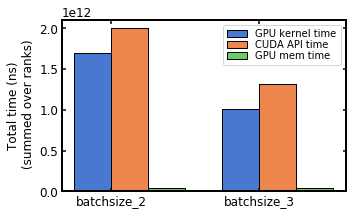

In [16]:
all_batch = list(d._hash.keys())
gpukerntime = [ sum([d[batch][r]['gpukernsum']['Total Time (ns)'].sum() 
                    for r in d[batch].keys()]) for batch in all_batch]
gpumemtime = [ sum([d[batch][r]['gpumemtimesum']['Total Time (ns)'].sum() 
                    for r in d[batch].keys()]) for batch in all_batch]
cudaapitime = [ sum([d[batch][r]['cudaapisum']['Total Time (ns)'].sum() 
                    for r in d[batch].keys()]) for batch in all_batch]
      
plt.ion()
plt.figure(figsize=figSize1x1)
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = gpukerntime
bars2 = cudaapitime
bars3 = gpumemtime
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color=colors[0], width=barWidth, edgecolor='k', label='GPU kernel time')
plt.bar(r2, bars2, color=colors[1], width=barWidth, edgecolor='k', label='CUDA API time')
plt.bar(r3, bars3, color=colors[2], width=barWidth, edgecolor='k', label='GPU mem time')
     
plt.ylabel('Total time (ns)\n (summed over ranks)')
#plt.ylim(0, 3.2e12)
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], all_batch);

plt.legend(loc=1)
plt.tight_layout()
#plt.savefig('figs/DeepCam_Batch_Time_vs_Batch.png', dpi=150, bbox_inches='tight')

In [30]:
gpukerneltime_cudacpitime_gpumemtime_sum = np.array(bars1)+np.array(bars2)+np.array(bars3)
print('Ratio of batch_3:batch_2 GPU kernel time + CUDA API time + GPU mem time = {}'.format(
    gpukerneltime_cudacpitime_gpumemtime_sum[1]/gpukerneltime_cudacpitime_gpumemtime_sum[0]))
print('Ratio of batch_3:batch_2 walltime = {}'.format(
    duration_seconds[1]/duration_seconds[0]))

Ratio of batch_3:batch_2 GPU kernel time + CUDA API time + GPU mem time = 0.6336366581972696
Ratio of batch_3:batch_2 walltime = 0.8772526942255108


Why is the speedup not more? Kernel and APU times summed are just $0.3$ times the batch size 32 case, but the speedup is only a factor of ~2, instead of factor ~3.3.  Is there 'hidden' time not accounted for here?